Количество кластеров: 1


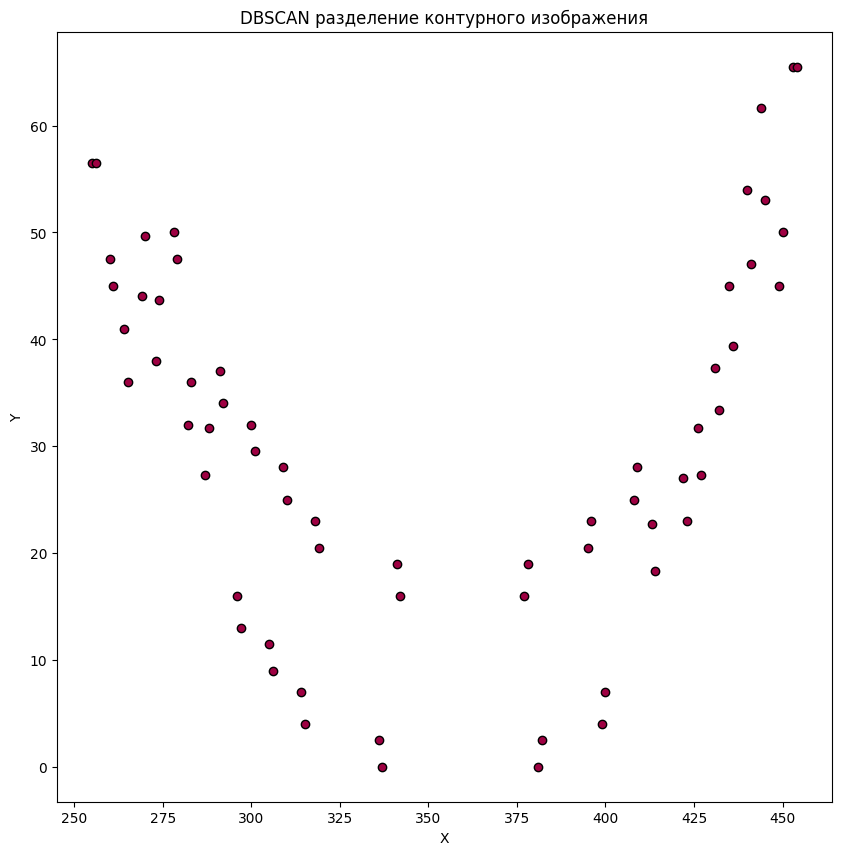

In [2]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Предположим, что у вас есть набор точек, представляющих контурное изображение
# Вам нужно преобразовать эти точки в массив NumPy
plt.figure(figsize=(10, 10))

points = []
xs,ys = [],[]
with open("output.txt", "r") as f:
    for i in f.readlines():
        x, y = i.split(',')
        if x == 'end':
            continue
        xs.append(float(x))
        ys.append(float(y))
ys = np.array(ys)
ys = max(ys)-ys
points = np.array(list(zip(xs,ys)))

# Настройте параметры алгоритма DBSCAN
eps = 50 # радиус окрестности
min_samples = 1  # минимальное количество точек в окрестности

# Создайте и примените модель DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(points)

# Выведите количество полученных кластеров
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Количество кластеров:", n_clusters)

# Визуализируйте результаты
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Шумовые точки отмечаются черным цветом
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = points[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('DBSCAN разделение контурного изображения')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


d:\Apps\Python\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


{0, 1, 2, 3, 4, 5, 6, 7}


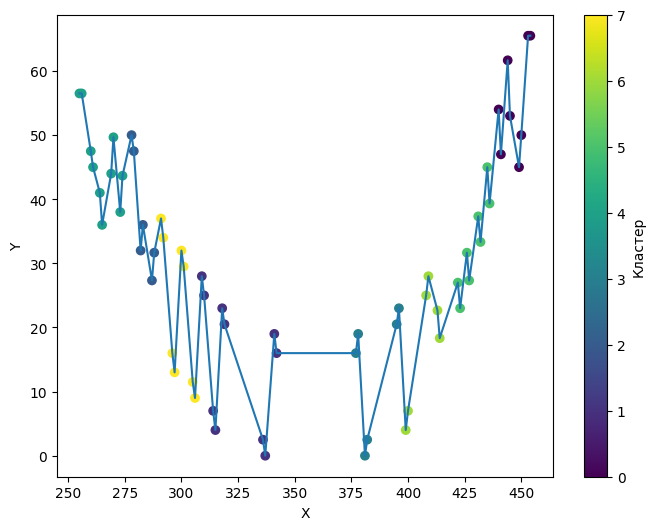

In [3]:
from sklearn import cluster
spectral = cluster.SpectralClustering(eigen_solver="arpack", affinity="nearest_neighbors")
clusters = spectral.fit_predict(np.array(xs).reshape(-1,1), ys)
print(set(clusters))
# Рисование графика с раскрашенными точками
plt.figure(figsize=(8, 6))
plt.plot(xs, ys)
plt.scatter(xs, ys, c=clusters, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Кластер')
plt.show()